
## EXPLORATORY ANALYSIS OF DATA AND FORECAST OF CANDIDATES WHO ARE INTERESTED OR NOT TO EXCHANGE EMPLOYMENT.


### DOWNLOADING FILES: TRAINING AND TESTING.

In [1]:
library(tidyverse)
base_treinamento<-read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_train.csv",
                         col_names = TRUE )
base_teste<-read_csv("../input/hr-analytics-job-change-of-data-scientists/aug_test.csv",
                     col_names = TRUE )


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  enrollee_id = col_double(),
  city = col_character(),
  city_development_index = col_double(),
  gender = col_character(),
  relevent_experience = col_character(),
  enrolled_university = col_character(),
  education_level = col_character(),
  major_discipline = col_character(),
  experience = col_character(),
  company_size = col_character(),
  company_type = col_character(),
  last_new_job = col_character(),
  training_hours = col_double(),
  target = col_double()
)



── Column specification ────────────────────────

In [2]:
base_treinamento %>% head() 
base_teste %>% head() 

enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NA,NA,1,36,1
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
11561,city_21,0.624,NA,No relevent experience,Full time course,Graduate,STEM,5,NA,NA,never,83,0
33241,city_115,0.789,NA,No relevent experience,NA,Graduate,Business Degree,<1,NA,Pvt Ltd,never,52,1
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
21651,city_176,0.764,NA,Has relevent experience,Part time course,Graduate,STEM,11,NA,NA,1,24,1


enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NA,1,21
9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NA,Pvt Ltd,1,98
31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NA,<1,NA,Pvt Ltd,never,15
27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
217,city_23,0.899,Male,No relevent experience,Part time course,Masters,STEM,10,NA,NA,2,12


### IDENTIFYING UNIQUE OBSERVATIONS FOR EACH DATABASE.

In [3]:
base_treinamento %>% distinct(enrollee_id,.keep_all = FALSE) ### 19158 unique candidates




enrollee_id
<dbl>
8949
29725
11561
33241
666
21651
28806
402
27107


In [4]:
base_teste %>% distinct(enrollee_id,.keep_all = FALSE) ### 2129 unique candidates

enrollee_id
<dbl>
32403
9858
31806
27385
27724
217
21465
27302
12994


### SAVING ID

In [5]:
ID_teste<-base_teste[,1]
ID_treinamento<-base_treinamento[,1]

### EXCLUDING VARIABLES ID (will not be used for data prediction)

In [6]:
base_treinamento<-base_treinamento[,-1]
base_teste<-base_teste[,-1]

## CATEGORIZING VARIABLES

### DATABASE TRAINING

In [7]:
library(stringr)

base_treinamento$city<-as_factor(base_treinamento$city)
base_treinamento$gender<-as_factor(base_treinamento$gender)
base_treinamento$relevent_experience<-as_factor(base_treinamento$relevent_experience)
base_treinamento$enrolled_university<-as_factor(base_treinamento$enrolled_university)
base_treinamento$education_level<-as_factor(base_treinamento$education_level)
base_treinamento$major_discipline<-as_factor(base_treinamento$major_discipline)
base_treinamento$experience<-as_factor(base_treinamento$experience)
base_treinamento$major_discipline<-as_factor(base_treinamento$major_discipline)
base_treinamento$company_size<-as_factor(base_treinamento$company_size)
base_treinamento$company_type<-as_factor(base_treinamento$company_type)
base_treinamento$last_new_job<-as_factor(base_treinamento$last_new_job)
base_treinamento$training_hours<-as.integer(base_treinamento$training_hours)
base_treinamento$target<-as_factor(base_treinamento$target)


## adjusting an element of the company size variable
base_treinamento$company_size<-str_replace_all(string = base_treinamento$company_size,pattern = "/",replacement = "-")
base_treinamento$company_size<-str_replace_all(string = base_treinamento$company_size,pattern = "10000\\+",replacement = ">10000")

## + is a special character .. you must escape it \\ +

### DATBASE TEST

In [8]:
base_teste$city<-as_factor(base_teste$city)
base_teste$gender<-as_factor(base_teste$gender)
base_teste$relevent_experience<-as_factor(base_teste$relevent_experience)
base_teste$enrolled_university<-as_factor(base_teste$enrolled_university)
base_teste$education_level<-as_factor(base_teste$education_level)
base_teste$major_discipline<-as_factor(base_teste$major_discipline)
base_teste$experience<-as_factor(base_teste$experience)
base_teste$major_discipline<-as_factor(base_teste$major_discipline)
base_teste$company_size<-as_factor(base_teste$company_size)
base_teste$company_type<-as_factor(base_teste$company_type)
base_teste$last_new_job<-as_factor(base_teste$last_new_job)
base_teste$training_hours<-as.integer(base_teste$training_hours)

## adjusting an element of the company size variable
base_teste$company_size<-str_replace_all(string = base_teste$company_size,pattern = "/",replacement = "-")
base_teste$company_size<-str_replace_all(string = base_teste$company_size,pattern = "10000\\+",replacement = ">10000")
## + is a special character .. you must escape it \\ +


# DATA IMPUTATION
## THIS CAN BE DONE FOR ALL VARIABLES.

## BUT, I WILL JUST DO FOR VARIABLE GENDER.


WE CAN OBSERVE THAT THERE ARE MANY MISSING VALUES (NAs) IN THE GENDER VARIABLE.

In [9]:
summary(base_treinamento$gender)
summary(base_teste$gender)


Male Female  Other   NA's 
 13221   1238    191   4508

Male Female  Other   NA's 
  1460    137     24    508

### These missing values ​​will be filled according to the percentage that the male, female and other elements represent in relation to the total.


Checking for missing values for each column.

In [10]:
quantidade<-NULL


for (i in 1 : length(base_treinamento)) {
  
    quantidade[i]<-sum(is.na(base_treinamento[,i]))
  
}
quantidade

[1]    0    0 4508    0  386  460 2813   65 5938 6140  423    0    0


### Amount of missing values column gender.
### AND
### Percentage amount of Male, Female and Other.

In [11]:

valores_NAs<-base_treinamento %>% count(gender) %>% filter(is.na(gender))


porcentagem<-base_treinamento %>% count(gender) %>% filter(!is.na(gender)) %>% mutate(percent=(n/sum(n)*100))


In [12]:
valores_NAs

gender,n
<fct>,<int>
NA,4508


In [13]:
porcentagem

gender,n,percent
<fct>,<int>,<dbl>
Male,13221,90.245734
Female,1238,8.450512
Other,191,1.303754


### Division of NAs according to Male, Female and Other.

In [14]:
quant<-NULL
for (i in 1 : nrow(porcentagem) ) {
  quant[i]<-(porcentagem$percent[i] * valores_NAs$n)/100
}
quant<-as.integer(round(quant))
  
base_NA<-base_treinamento %>% filter(is.na(gender))
 
base_NA$gender[1:quant[1]]<-"Male"
base_NA$gender[4069:sum(quant[1:2])]<-"Female"
base_NA$gender[4450:sum(quant[1:3])]<-"Other"



base_treinamento$gender[is.na(base_treinamento$gender)]<-base_NA$gender

summary(base_treinamento$gender)



Male Female  Other 
 17289   1619    250

### REPEAT WITH DATABASE TEST.

In [15]:
  valores_NAs<-base_teste %>% count(gender) %>% filter(is.na(gender))
  
  
  porcentagem<-base_teste %>% count(gender) %>% filter(!is.na(gender)) %>% mutate(percent=(n/sum(n)*100))
  

  quant<-NULL
  for (i in 1 : nrow(porcentagem) ) {
    quant[i]<-(porcentagem$percent[i] * valores_NAs$n)/100
  }
  quant<-round(quant) 
  
  base_NA2<-base_teste %>% filter(is.na(gender))
  
  base_NA2$gender[1:quant[1]]<-"Male"
  base_NA2$gender[(quant[1] + 1):sum(quant[1:2])]<-"Female"
  base_NA2$gender[sum(quant[1:2]) :(sum(quant[1:3])-1)]<-"Other"
  
  base_teste$gender[is.na(base_teste$gender)]<-base_NA2$gender

summary(base_teste$gender)

Male Female  Other 
  1918    179     32

# GRAPHIC VIEWS.

### 10 cities with better development indices.

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



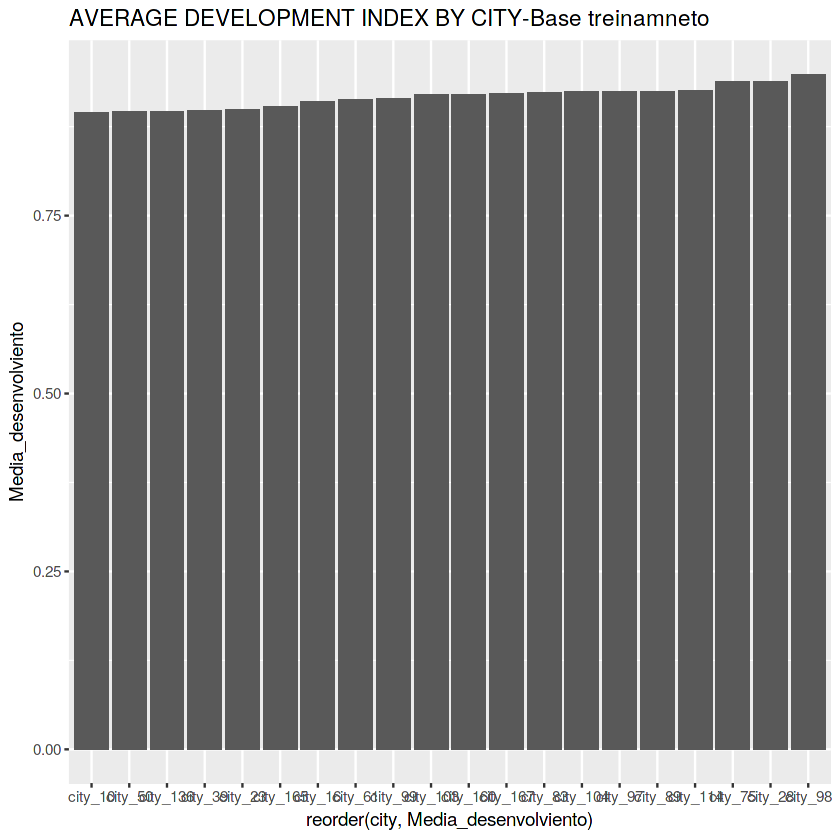

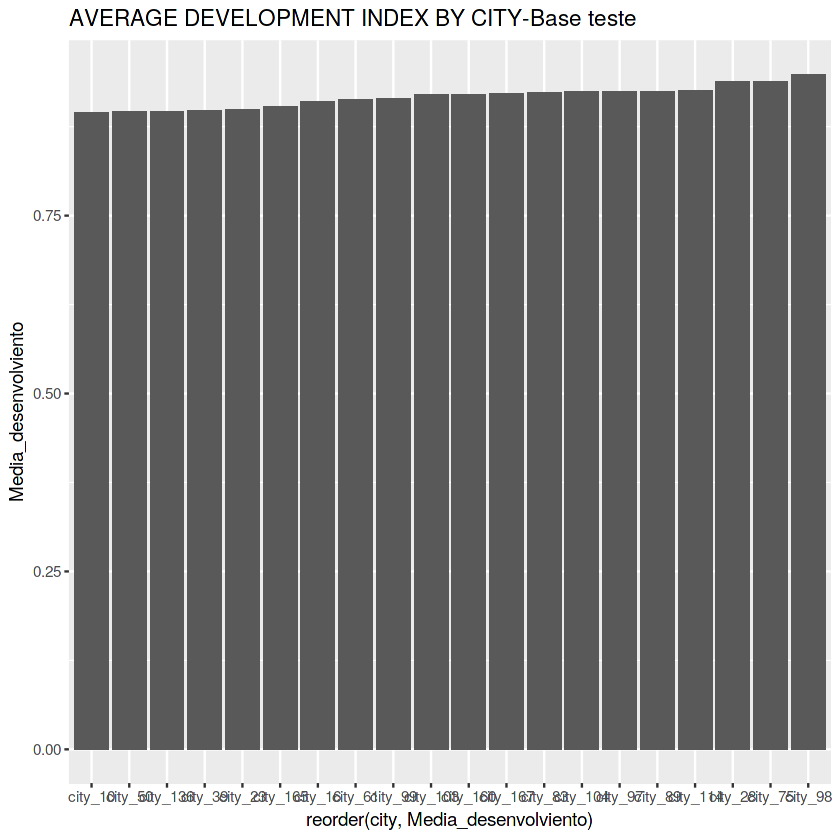

In [16]:
library(ggplot2)
base_treinamento %>% group_by(city) %>% summarize(Media_desenvolviento=mean(city_development_index,na.rm = TRUE),Freq=n()) %>% arrange(desc(Media_desenvolviento)) %>% head(20) %>%
  ggplot()+
    geom_col(mapping = aes(x = reorder(city,Media_desenvolviento),y = Media_desenvolviento))+
    ggtitle("AVERAGE DEVELOPMENT INDEX BY CITY-Base treinamneto")

base_teste %>% group_by(city) %>% summarize(Media_desenvolviento=mean(city_development_index,na.rm = TRUE),Freq=n()) %>% arrange(desc(Media_desenvolviento)) %>% head(20) %>%
  ggplot()+
  geom_col(mapping = aes(x = reorder(city,Media_desenvolviento),y = Media_desenvolviento))+
  ggtitle("AVERAGE DEVELOPMENT INDEX BY CITY-Base teste")




### 10 cities with the highest frequencies by gender.

`summarise()` regrouping output by 'city' (override with `.groups` argument)

`summarise()` regrouping output by 'city' (override with `.groups` argument)



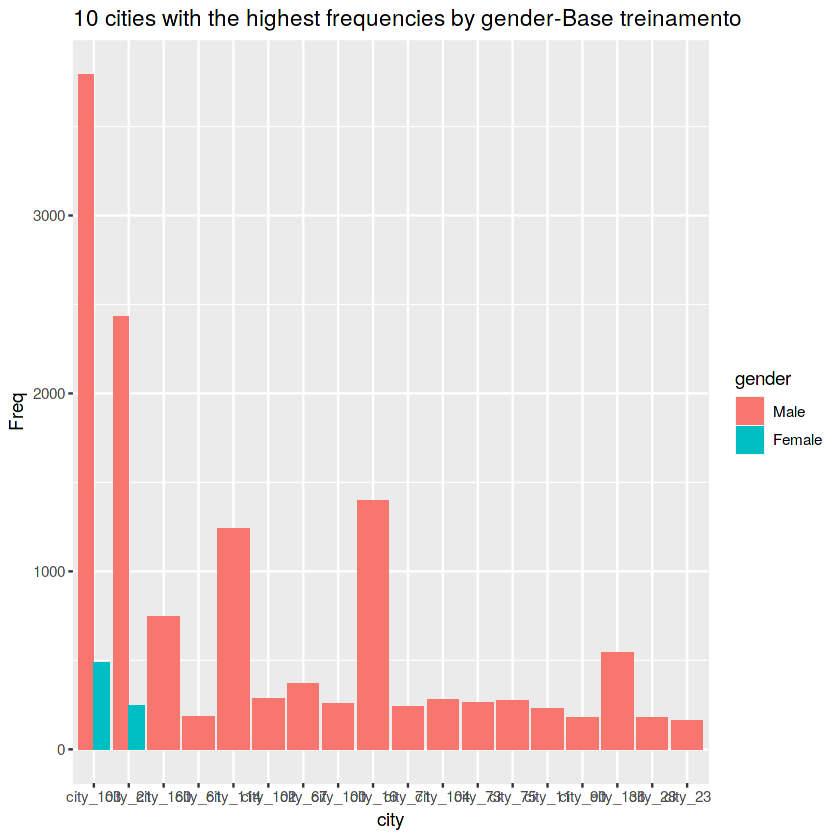

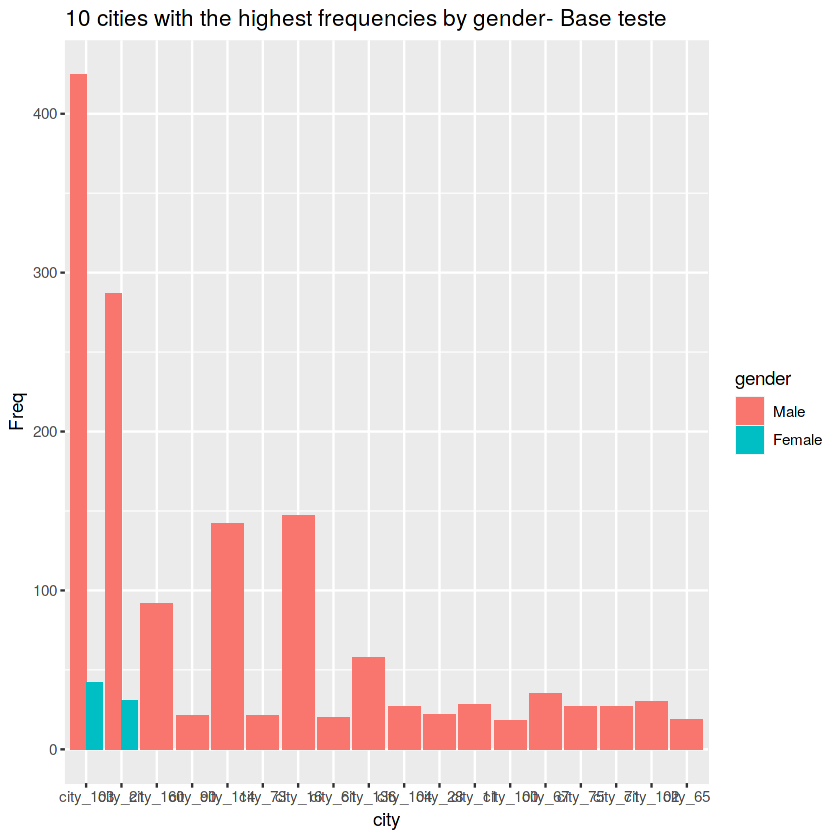

In [17]:
base_treinamento %>% group_by(city,gender) %>% summarize(Media_desenvolviento=mean(city_development_index,na.rm = TRUE),Freq=n()) %>% arrange(desc(Freq)) %>% head(20) %>%
  ggplot()+
  geom_col(mapping = aes(x = city,y = Freq, fill=gender),position = "dodge")+
  ggtitle("10 cities with the highest frequencies by gender-Base treinamento")


base_teste %>% group_by(city,gender) %>% summarize(Media_desenvolviento=mean(city_development_index,na.rm = TRUE),Freq=n()) %>% arrange(desc(Freq)) %>% head(20) %>%
  ggplot()+
  geom_col(mapping = aes(x = city,y = Freq, fill=gender),position = "dodge")+
  ggtitle("10 cities with the highest frequencies by gender- Base teste")




### GRAPHIC BOX PLOT OF HOURS OF TRAINING BY BY GENDER.

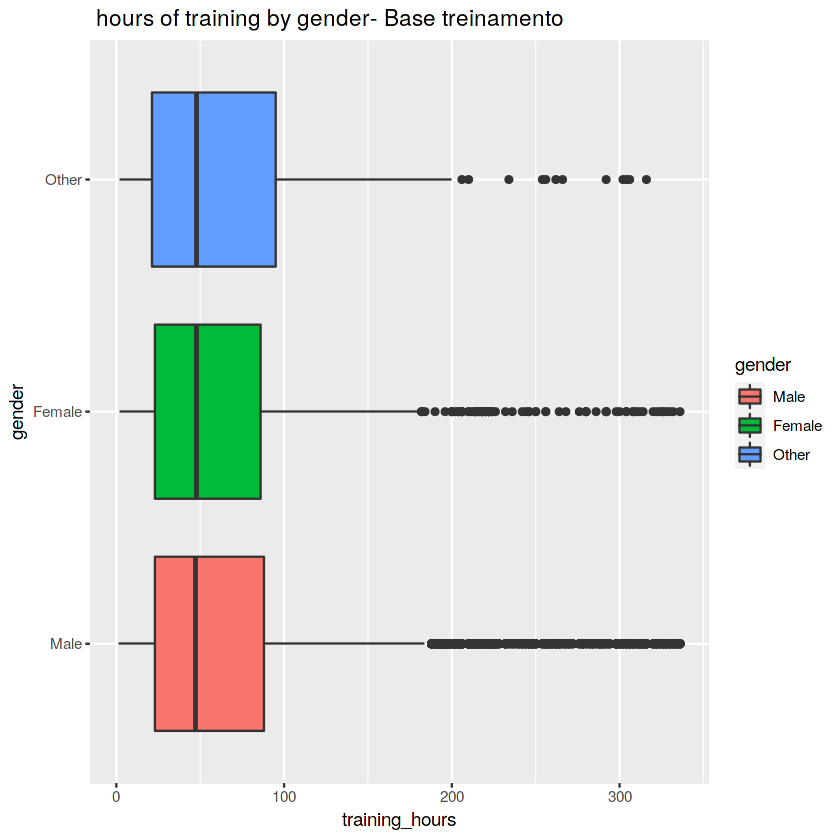

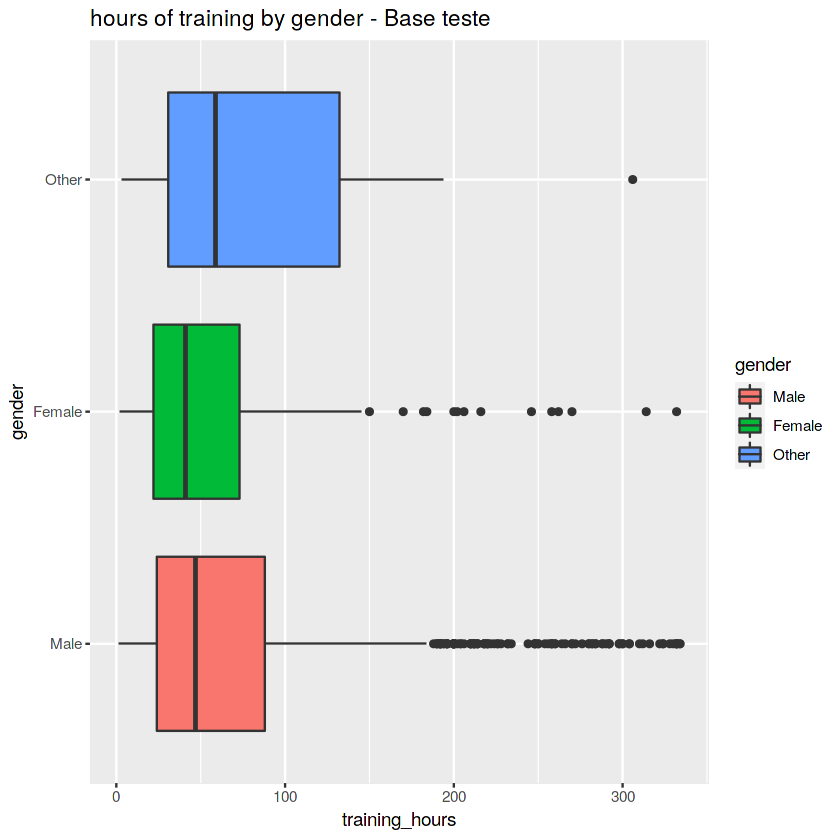

In [18]:
base_treinamento %>%
  ggplot()+
    geom_boxplot(mapping = aes(x= gender,y= training_hours,fill=gender))+
      coord_flip()+
      ggtitle(" hours of training by gender- Base treinamento")

base_teste %>%
  ggplot()+
  geom_boxplot(mapping = aes(x= gender,y= training_hours,fill=gender))+
  coord_flip()+
  ggtitle("hours of training by gender - Base teste")  



### GRADUATION LEVEL.

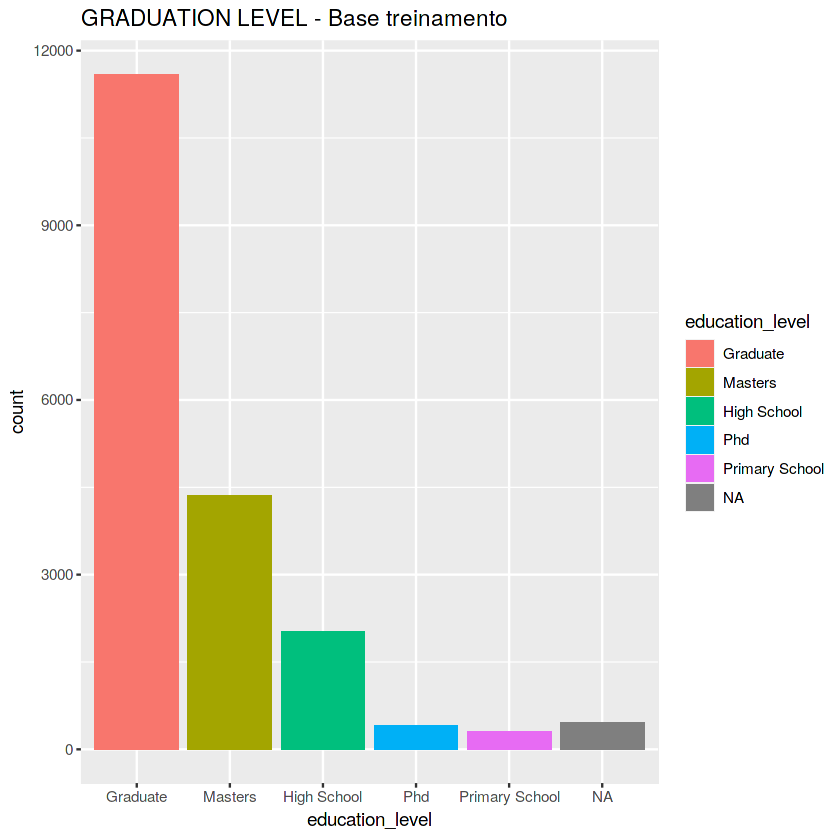

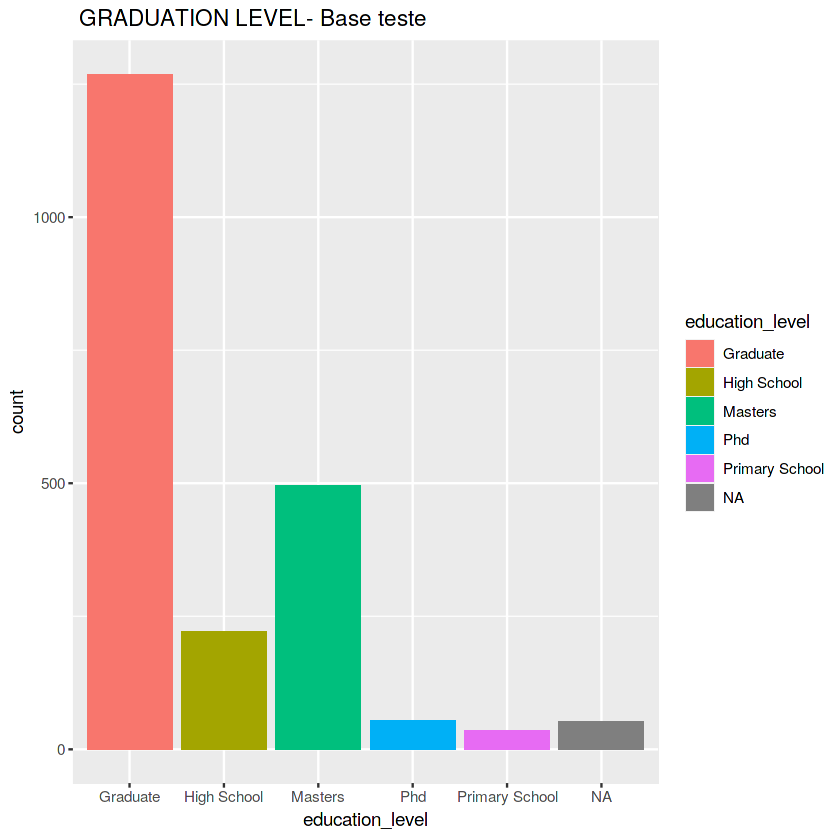

In [19]:
  base_treinamento %>%
    ggplot()+
      geom_bar(mapping = aes(x = education_level, fill=education_level),show.legend = TRUE)+
    ggtitle("GRADUATION LEVEL - Base treinamento")
  
  base_teste %>%
    ggplot()+
    geom_bar(mapping = aes(x = education_level, fill=education_level),show.legend = TRUE)+
    ggtitle(" GRADUATION LEVEL- Base teste")
  



#### GRADUATION LEVEL BY GENDER.

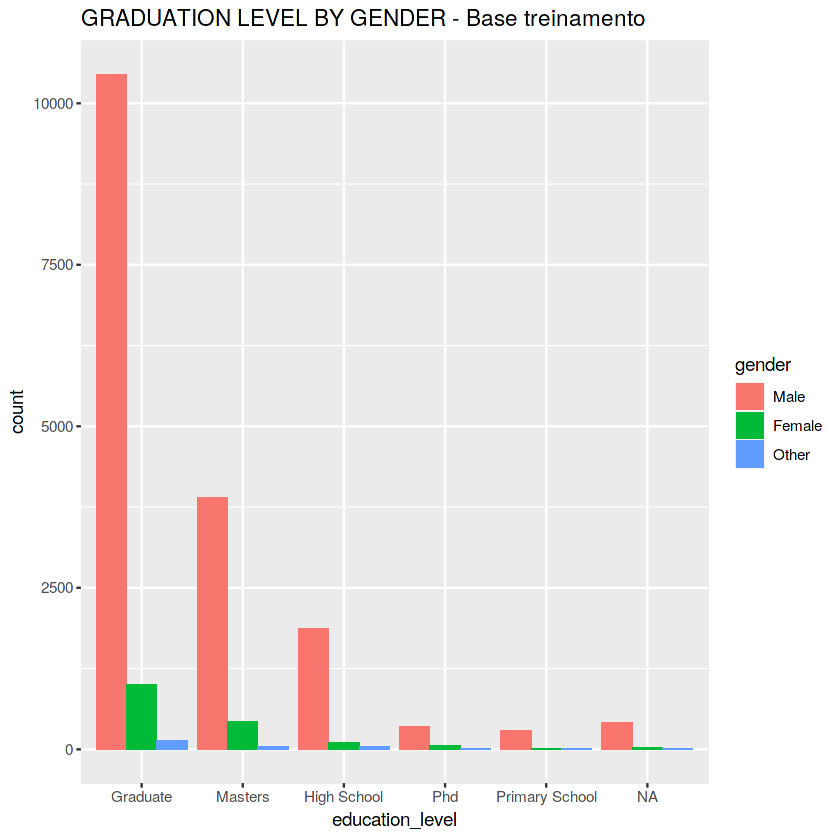

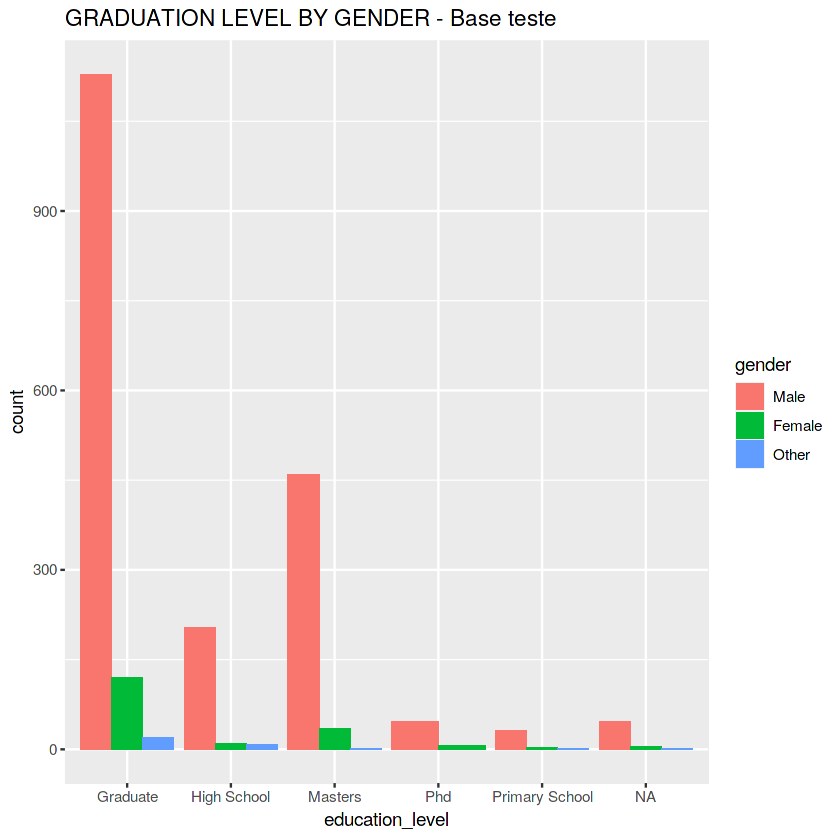

In [20]:
  base_treinamento %>%
    ggplot()+
    geom_bar(mapping = aes(x = education_level, fill=gender),position = "dodge")+
    ggtitle("GRADUATION LEVEL BY GENDER - Base treinamento")
  
  base_teste %>%
    ggplot()+
    geom_bar(mapping = aes(x = education_level, fill=gender),position = "dodge")+
    ggtitle("GRADUATION LEVEL BY GENDER - Base teste")


# APPLICATION OF DATA FORECASTING ALGORITHM.

## USING DECISION TREE ALGORITHM.

In [21]:
    library(rpart)
    mdl_arvore_decisao<-rpart(formula =target ~.,data = base_treinamento )



DECISION TREE GRAPHIC.

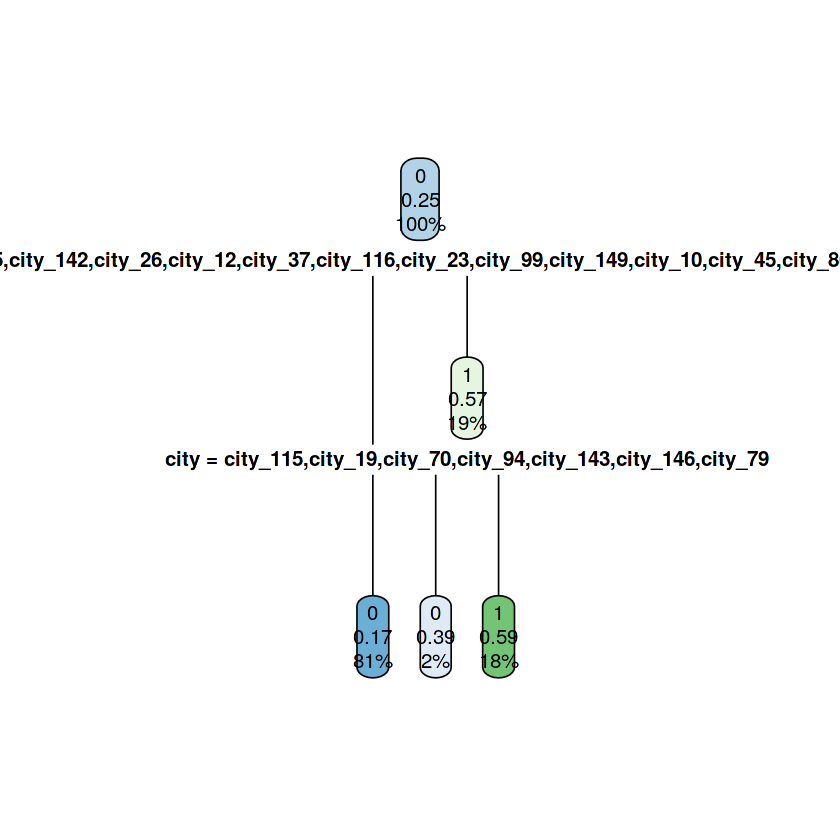

In [22]:
    library(rpart.plot)
    rpart.plot(mdl_arvore_decisao,extra = "auto")
    


## PROVIDE THE PROBABILITY OF CANDIDATES TO BE INTERESTED OR NOT TO EXCHANGE JOBS.

## Remember
### 0 = " Not looking for job change"
### 1 = " Looking for a job change"

### Forecast

In [23]:
previsao<-predict(mdl_arvore_decisao,newdata = base_teste)
    
  previsao<-as_tibble(previsao)
    head(previsao,15)

0,1
<dbl>,<dbl>
0.8288604,0.1711396
0.8288604,0.1711396
0.4114219,0.5885781
0.8288604,0.1711396
0.8288604,0.1711396
0.8288604,0.1711396
0.4114219,0.5885781
0.8288604,0.1711396
0.8288604,0.1711396


###  The result greater than 0.5 will be chosen, so ...

In [24]:
   previsao_ajustada<-ifelse(test =  previsao$'0' >= 0.5,yes = previsao$'0',no = previsao$'1' )
    
    previsao_ajustada<-as_tibble(previsao_ajustada)
    names(previsao_ajustada)<-"target"
    
    previsao_ajustada<-tibble(ID_teste,previsao_ajustada)

    head(previsao_ajustada,20)

enrollee_id,target
<dbl>,<dbl>
32403,0.8288604
9858,0.8288604
31806,0.5885781
27385,0.8288604
27724,0.8288604
217,0.8288604
21465,0.5885781
27302,0.8288604
12994,0.8288604
